In [1]:
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

import math

import matplotlib.pyplot as plt

from scipy.spatial import distance

mbyte = 1048576
norm_l1 = Normalizer(norm='l1')
norm_l2 = Normalizer(norm='l2')

# Approximate Furthest Neighbor Search

## Query Dependent

In [2]:
P = datasets.make_blobs(n_features=2, n_samples=500, centers=1, cluster_std=5, random_state=1)[0]
train, test = train_test_split(P, test_size=50, random_state=1)

In [3]:
test -= train.mean(axis=0)
train -= train.mean(axis=0)

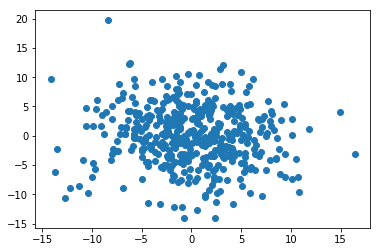

In [4]:
plt.scatter(train[:, 0], train[:, 1])
plt.show()

number of random lines
$$
l = 2n^{\frac{1}{c^2}}
$$

number of candidates to be examined at query time
$$
m = 1 + e^2l\text{log}^{\frac{c^2}{2} - \frac{1}{3}}n
$$

In [5]:
import heapq

In [6]:
n, d = train.shape

c = math.sqrt(2)

l = math.ceil(2 * (n ** (1 / c**2)))

m = 1 + math.ceil(math.e ** 2 * math.log(n) ** (c**2 / 2 - 1 / 3))

print('c: {}, m: {}, l: {}'.format(c, m, l))

c: 1.4142135623730951, m: 26, l: 43


In [7]:
l = 50
m = 50

**A:**
$l$ 个向量 $\in \mathbb{R}^d \sim N(0, 1)$

In [8]:
A = np.random.normal(0, 1, (l, d))

In [9]:
S = []

for i, a in enumerate(A):
    H = train.dot(a)
    S.append(H.argsort()[::-1][:m])
    
S = np.array(S)

第 $i$ 个投影方向的最大的 $m$ 个点
$$
S_{i\in[l]} = \text{argmax}_i^m x\cdot A_i
$$

In [10]:
q = test[3]
queue = []

for i, a in enumerate(A):
    Hx = train[S[i][0]].dot(a)
    Hq = q.dot(a)
    heapq.heappush(queue, (-(Hx - Hq), S[i][0], i, 0)) # 用负数实现最大堆，取出时要负数回来

In [11]:
candidates = []
for j in range(m):
    value, idx, i, order = heapq.heappop(queue)
    value = -value
    
    candidates.append(idx)
    
    Hx = train[S[i][order + 1]].dot(A[i])
    Hq = q.dot(A[i])
    
    heapq.heappush(queue, (-(Hx - Hq), S[i][order + 1], i, order + 1))
    
#     print(value)

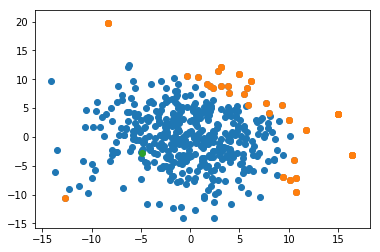

In [12]:
plt.scatter(train[:, 0], train[:, 1])
plt.scatter(train[candidates, 0], train[candidates, 1])
plt.scatter(q[0], q[1])
plt.show()

---

## Query Independent

> $\sqrt 2$-Approximation

choose $a_1, a_2, ..., a_l$ unit vectors in $d$ dimensions

In [13]:
P = datasets.make_blobs(n_features=2, n_samples=500, centers=1, cluster_std=5, random_state=1)[0]
train, test = train_test_split(P, test_size=50, random_state=1)

In [14]:
test -= train.mean(axis=0)
train -= train.mean(axis=0)

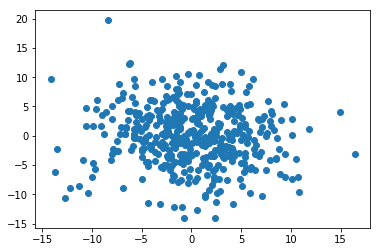

In [15]:
plt.scatter(train[:, 0], train[:, 1])
plt.show()

In [16]:
l = 20

In [17]:
n, d = train.shape
A = norm_l2.fit_transform(np.random.normal(0, 1, (l, d)))

In [18]:
%%time
S = np.unique(train.dot(A.T).argmax(axis=0))

CPU times: user 220 µs, sys: 20 µs, total: 240 µs
Wall time: 180 µs


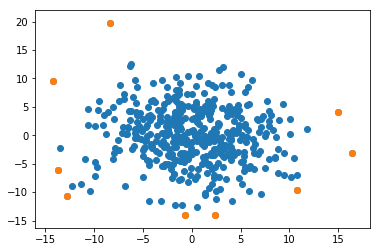

In [19]:
plt.scatter(train[:, 0], train[:, 1])
plt.scatter(train[S, 0], train[S, 1])
plt.show()